---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [24]:
def answer_one():
    file_path = 'assets/fraud_data.csv'
    data = pd.read_csv(file_path)

    #print(data.head())

    fraud_percentage = data['Class'].sum() / len(data)
    return fraud_percentage
    #raise NotImplementedError()
answer_one()

0.016410823768035772

In [7]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [9]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_majority_predicted = dummy_majority.predict(X_test)
    
    accuracy=accuracy_score(y_test, y_majority_predicted)
    recall=recall_score(y_test, y_majority_predicted)
    return accuracy, recall
    #raise NotImplementedError()
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [10]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC
    
    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test)
    
    accuracy=accuracy_score(y_test, svm_predicted)
    recall=recall_score(y_test, svm_predicted)
    precision=precision_score(y_test, svm_predicted)
    
    return accuracy, recall, precision
    #raise NotImplementedError()
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [12]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    parameters={'C': 1e9, 'gamma': 1e-07}
    threshold = -220
    
    svm = SVC(**parameters).fit(X_train, y_train)
    decision_function_scores = svm.decision_function(X_test)

    svm_predicted = (decision_function_scores > threshold).astype(int)
    confusion = confusion_matrix(y_test, svm_predicted)
    
    return confusion
    #raise NotImplementedError()
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

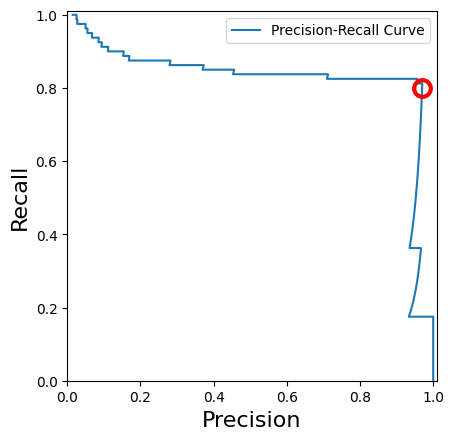

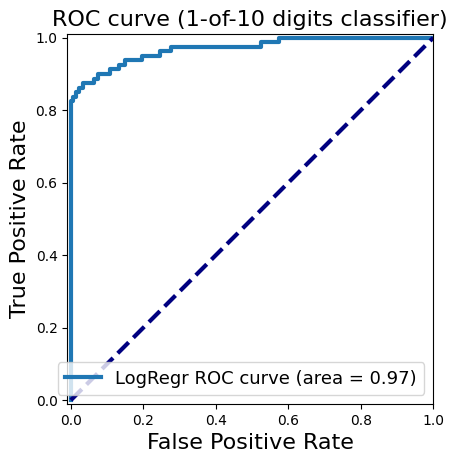

C:\Users\User\AppData\Local\Temp\ipykernel_15348\2237601977.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  recall = float(recall[np.where(precision==0.75)])


(0.825, 0.9375)

In [32]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve,auc
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    lr = LogisticRegression(max_iter=1000)
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.gca().set_aspect('equal')  # Set the aspect ratio
    plt.legend()
    plt.show()

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.axes().set_aspect('equal')#PRODUCE ERROR SE SUSTITUYE POR LO SIGUIENTE
    plt.gca().set_aspect('equal')  # Set the aspect ratio
    plt.show()

    recall = float(recall[np.where(precision==0.75)])
    
    true_positive_rate = np.interp(0.16, fpr_lr, tpr_lr)
    
    return recall,true_positive_rate
    #raise NotImplementedError()
answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [21]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression(max_iter=1000,solver='liblinear')
    grid_values = {'C': [0.01, 0.1, 1, 10],'penalty': ['l1', 'l2']}

    grid_lr_recall = GridSearchCV(lr, param_grid = grid_values, scoring='recall' )
    grid_lr_recall.fit(X_train, y_train)
    
    mean_test_scores = np.array(grid_lr_recall.cv_results_['mean_test_score'].reshape((4, 2))) 
    
    return mean_test_scores
    #raise NotImplementedError()
answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

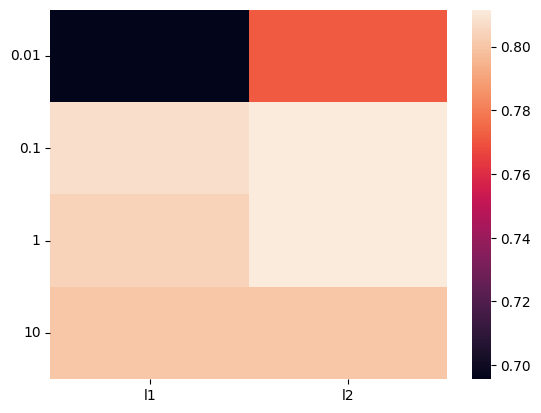

In [23]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())